In [1]:
pip install wbdata pandas matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 39.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 35.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 36.5 MB/s eta 0:00:00

   ----- ----------------------------------  2/16 [tabulate]
   ------- --------------------------------  3/16 [regex]
   ---------- -----------------------------  4/16 [pyparsing]
   ---------- -----------------------------  4/16 [pyparsing]
   ------------ ---------------------------  5/16 [pillow]
   ------------ ---------------------------  5/16 [pillow]
   ------------ ---------------------------  5/16 [pillow]
   ------------ ---------------------------  5/16 [pillow]
   ------------ ---------------------------  5/16 [pillow]
   ------------ -------

In [18]:
pip install ipywidgets seaborn


Note: you may need to restart the kernel to use updated packages.


**Parte 1: Código de Webscaping**

In [11]:
# 1. CONSULTA A LA API DEL WORLD BANK
import wbdata
import pandas as pd

# Indicador: Gasto público en salud (% del PIB)
indicators = {"SH.XPD.CHEX.GD.ZS": "health_spending"}

# Países de Sudamérica (excluyendo Surinam, Guyana y Guayana Francesa)
sudamerica_codigos = {
    'Argentina': 'AR',
    'Bolivia': 'BO',
    'Brasil': 'BR',
    'Chile': 'CL',
    'Colombia': 'CO',
    'Ecuador': 'EC',
    'Paraguay': 'PY',
    'Perú': 'PE',
    'Uruguay': 'UY',
    'Venezuela': 'VE'
}

# Consulta a la API
df = wbdata.get_dataframe(indicators, country=list(sudamerica_codigos.values()))

# Limpiar y transformar
df = df.reset_index()
df["year"] = df["date"].astype(str).str[:4].astype(int)
df = df[(df["year"] >= 2018) & (df["year"] <= 2024)]
df = df.dropna()

# Pivot para tener columnas limpias por país y año
df_pivot = df.pivot_table(index=["country", "year"], values="health_spending").reset_index()


**Parte 2: Guardar datos extraídos en un csv**

In [13]:
# 2. GUARDAR CSV CON CODIFICACIÓN COMPATIBLE CON EXCEL
df_pivot.to_csv("gasto_salud_sudamerica_2018_2024.csv", index=False, encoding="utf-8-sig")


**Parte 3: Realizar gráficos sobre el gasto de pbi en salud**

In [15]:
# 1. GRÁFICO INTERACTIVO POR PAÍS
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# Leer el archivo CSV
df = pd.read_csv("gasto_salud_sudamerica_2018_2024.csv")

# Función para graficar un país
def graficar_pais(pais):
    datos = df[df["country"] == pais]
    plt.figure(figsize=(8,5))
    plt.plot(datos["year"], datos["health_spending"], marker='o', linestyle='-')
    plt.title(f"{pais} - Gasto Público en Salud (% del PIB)")
    plt.xlabel("Año")
    plt.ylabel("Gasto en Salud (% del PIB)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Interfaz interactiva
interact(graficar_pais, pais=sorted(df["country"].unique()))


interactive(children=(Dropdown(description='pais', options=('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colomb…

<function __main__.graficar_pais(pais)>

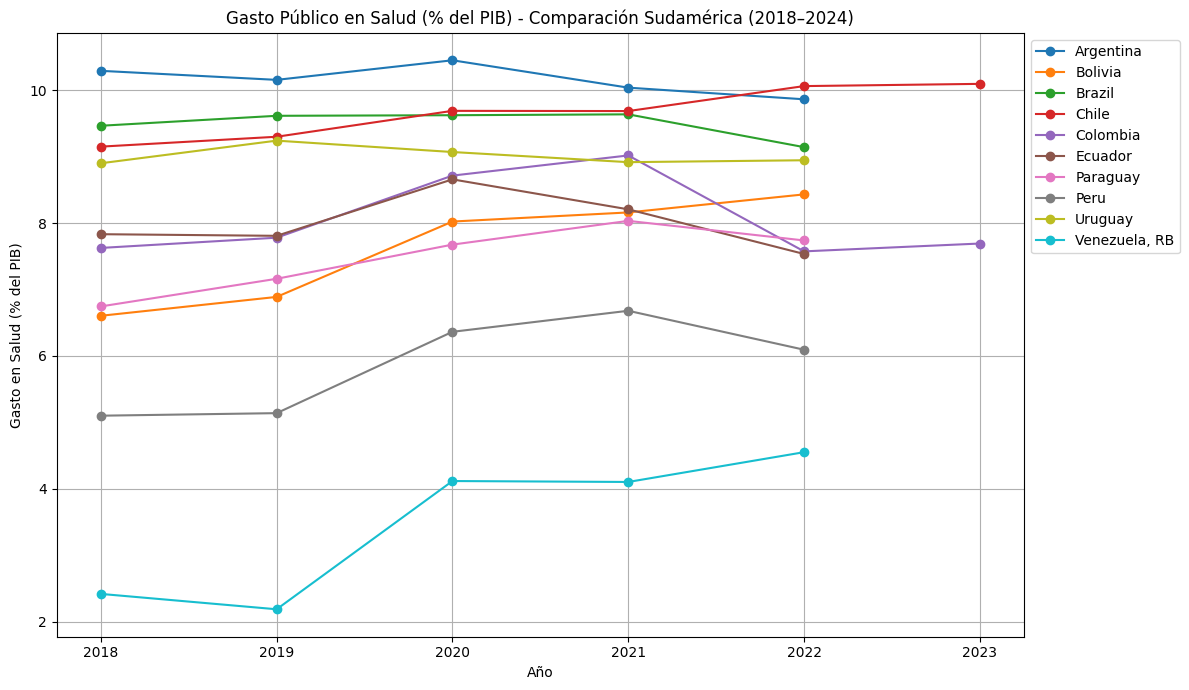

In [16]:
# 2. GRÁFICO COMPARATIVO DE TODOS LOS PAÍSES
import matplotlib.pyplot as plt

# Reutiliza el df leído antes
plt.figure(figsize=(12,7))
for pais in df["country"].unique():
    datos = df[df["country"] == pais]
    plt.plot(datos["year"], datos["health_spending"], marker='o', linestyle='-', label=pais)

plt.title("Gasto Público en Salud (% del PIB) - Comparación Sudamérica (2018–2024)")
plt.xlabel("Año")
plt.ylabel("Gasto en Salud (% del PIB)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


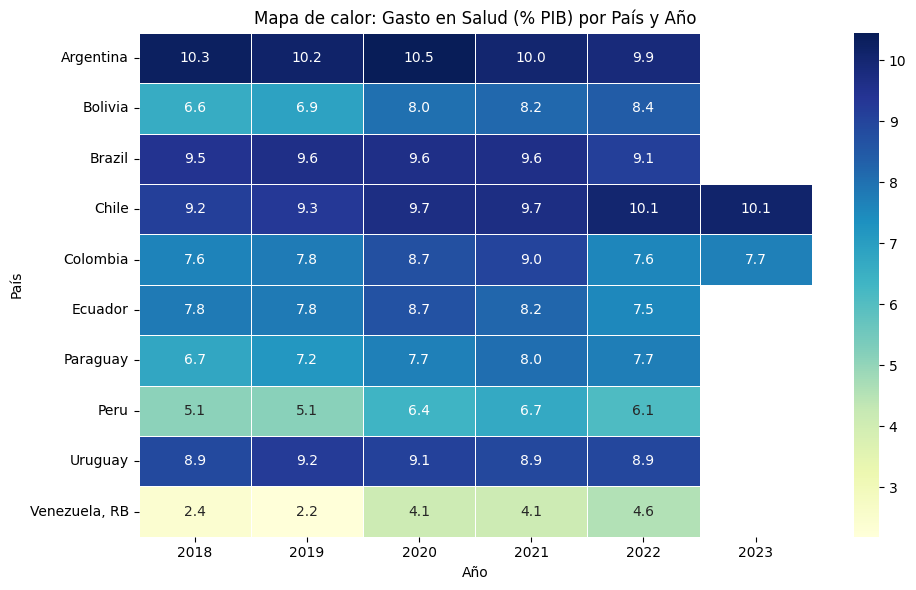

In [19]:
# 3. MAPA DE CALOR (HEATMAP) DE GASTO POR PAÍS Y AÑO
import seaborn as sns

# Crear matriz para el mapa de calor
heatmap_data = df.pivot(index="country", columns="year", values="health_spending")

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Mapa de calor: Gasto en Salud (% PIB) por País y Año")
plt.xlabel("Año")
plt.ylabel("País")
plt.tight_layout()
plt.show()
